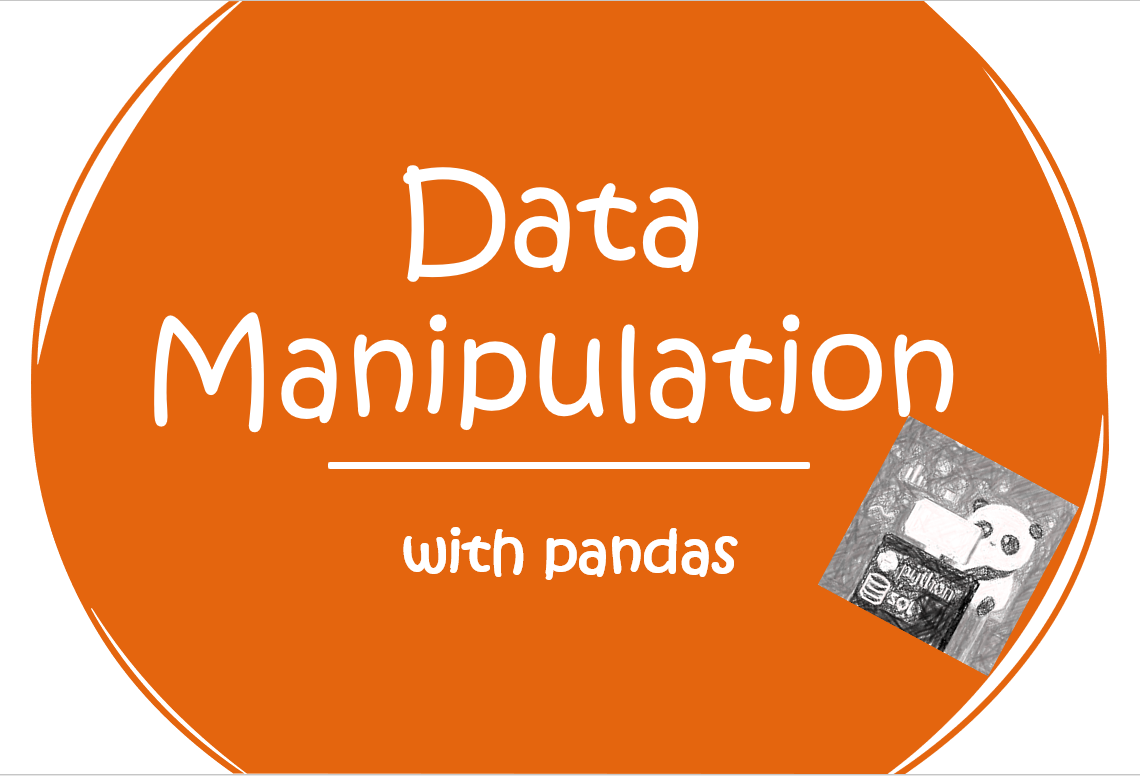

### Time-Series with Pandas 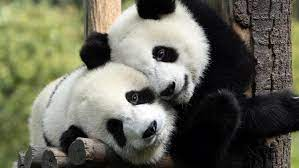

### Direct use of Python commands

In [2]:
from datetime import datetime
datetime(year=2023, month = 1, day=31, hour=4, minute= 32, second=5)

datetime.datetime(2023, 1, 31, 4, 32, 5)

In [3]:
from dateutil import parser
date= parser.parse('31st of January, 2023 4pm')

In [4]:
date

datetime.datetime(2023, 1, 31, 16, 0)

In [5]:
date.strftime('%A') # standard string format code for printing dates

'Tuesday'

In [10]:
#!pip install pytz

In [6]:
import pytz
from pytz import timezone

In [8]:
format = '%Y-%m-%d %H:%M:%S %Z%z'

# current time in UTC
now_utc =datetime.now(timezone('GMT'))
print(now_utc.strftime(format))

2023-01-30 13:39:05 GMT+0000


In [10]:
# current time to Istanbul timezone
now_turkey =datetime.now(timezone('Europe/Istanbul'))
print(now_turkey.strftime(format))

2023-01-30 16:40:30 +03+0300


### Using Numpy

In [12]:
import numpy as np

In [13]:
date2 = np.array('2023-01-30',dtype=np.datetime64)
date2

array('2023-01-30', dtype='datetime64[D]')

In [15]:
date2 + np.arange(10) #returns an np array constructed by the days(starting with date2)

array(['2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02',
       '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06',
       '2023-02-07', '2023-02-08'], dtype='datetime64[D]')

In [16]:
print(np.datetime64('2021-03-12')) # day-based
print('\n')
print(np.datetime64('2021-03-12 16:00')) # minute-based

2021-03-12


2021-03-12T16:00


In [17]:
np.array([0, 123435849893]).astype('datetime64[ms]') # converting it into timestamp in microsecond

array(['1970-01-01T00:00:00.000', '1973-11-29T15:44:09.893'],
      dtype='datetime64[ms]')

In [18]:
np.array([0, 123435849893]).astype('datetime64[s]') # converting it into timestamp in second

array(['1970-01-01T00:00:00', '5881-07-11T16:04:53'],
      dtype='datetime64[s]')

### Using Pandas

In [19]:
import pandas as pd

In [22]:
#regular sequence
date3 = pd.date_range('2019-01-01',periods=8, freq='H')
date3

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [25]:
date4 = pd.period_range('2019-01-01',periods=4, freq='M')
date4

PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04'], dtype='period[M]')

In [29]:
date5 = pd.timedelta_range(2, periods=12,freq='H') # creating a sequence of durations
date5

TimedeltaIndex(['0 days 00:00:00.000000002', '0 days 01:00:00.000000002',
                '0 days 02:00:00.000000002', '0 days 03:00:00.000000002',
                '0 days 04:00:00.000000002', '0 days 05:00:00.000000002',
                '0 days 06:00:00.000000002', '0 days 07:00:00.000000002',
                '0 days 08:00:00.000000002', '0 days 09:00:00.000000002',
                '0 days 10:00:00.000000002', '0 days 11:00:00.000000002'],
               dtype='timedelta64[ns]', freq='H')

In [32]:
# change the timezone information
date_utc = date3.tz_localize('Asia/Dubai')
print(date_utc)
print(date_utc.tz_convert('Asia/Kolkata'))

DatetimeIndex(['2019-01-01 00:00:00+04:00', '2019-01-01 01:00:00+04:00',
               '2019-01-01 02:00:00+04:00', '2019-01-01 03:00:00+04:00',
               '2019-01-01 04:00:00+04:00', '2019-01-01 05:00:00+04:00',
               '2019-01-01 06:00:00+04:00', '2019-01-01 07:00:00+04:00'],
              dtype='datetime64[ns, Asia/Dubai]', freq=None)
DatetimeIndex(['2019-01-01 01:30:00+05:30', '2019-01-01 02:30:00+05:30',
               '2019-01-01 03:30:00+05:30', '2019-01-01 04:30:00+05:30',
               '2019-01-01 05:30:00+05:30', '2019-01-01 06:30:00+05:30',
               '2019-01-01 07:30:00+05:30', '2019-01-01 08:30:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', freq=None)


In [33]:
indx =pd.date_range('2020-03-10',periods=7, freq='D')
print(indx)
print('\n')
pd_s = pd.Series(range(len(indx)),index=indx)
print(pd_s)

DatetimeIndex(['2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16'],
              dtype='datetime64[ns]', freq='D')


2020-03-10    0
2020-03-11    1
2020-03-12    2
2020-03-13    3
2020-03-14    4
2020-03-15    5
2020-03-16    6
Freq: D, dtype: int64


In [36]:
pd_s.resample('2D').mean()

2020-03-10    0.5
2020-03-12    2.5
2020-03-14    4.5
2020-03-16    6.0
Freq: 2D, dtype: float64

In [37]:
pd_s.resample('3D').median()

2020-03-10    1.0
2020-03-13    4.0
2020-03-16    6.0
Freq: 3D, dtype: float64

### Practice question: Using pd_s.resample('2D').mean(), How do we return the resampled data in odd days ?
<br> 2020-03-11: 0.5
<br>2020-03-13: 2.5
<br>2020-03-15: 4.5
<br>2020-03-16: 6

In [40]:
## 
print(pd_s.resample('2D', convention='e').mean()) # the use of convention(default is 's')

2020-03-10    0.5
2020-03-12    2.5
2020-03-14    4.5
2020-03-16    6.0
Freq: 2D, dtype: float64


In [42]:
day_specified=pd.Timestamp('2023-08-15')

day_specified.day_name()

'Tuesday'

In [45]:
day_plus= day_specified+pd.Timedelta('4 day') 
day_plus.day_name()

'Saturday'

In [46]:
bus_day = day_specified + pd.offsets.BDay(4)

In [48]:
bus_day.day_name()

'Monday'

In [54]:
t_p = pd.Period('2011-01')
t_p

Period('2011', 'A-DEC')

In [52]:
control = pd.Timestamp('2011-01-15')

In [53]:
t_p.start_time<control<t_p.end_time

True

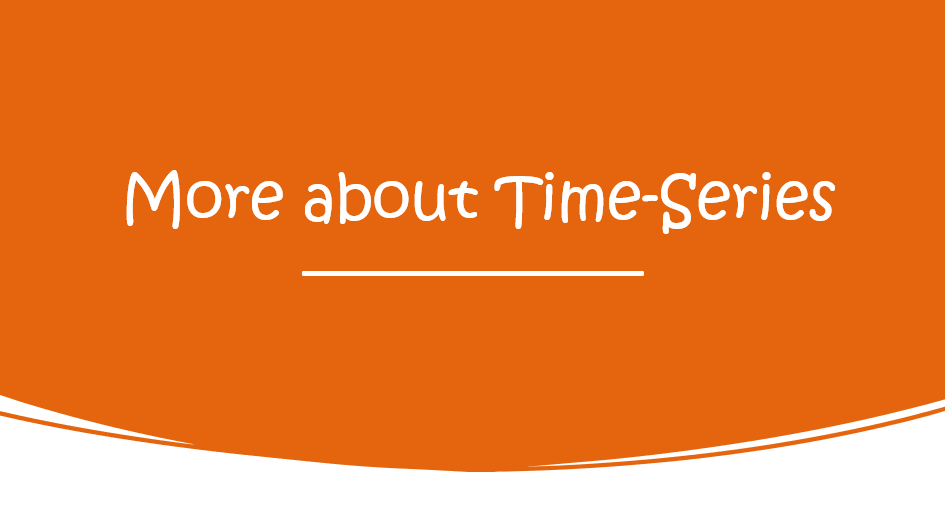

In [105]:
!pip install yfinance

  Using cached yfinance-0.2.9-py2.py3-none-any.whl (55 kB)
  Using cached frozendict-2.3.4-cp39-cp39-win_amd64.whl (35 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)


In [106]:
!pip install yahoofinancials

In [107]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [108]:
aapl_df = yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


In [113]:
ticker = yf.Ticker('AAPL')
yahoo = ticker.history(period="15y")
yahoo.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-01-30 00:00:00-05:00,3.999362,4.123572,3.957654,4.024021,1243051600,0.0,0.0
2008-01-31 00:00:00-05:00,3.940910,4.160103,3.939388,4.120831,1345674400,0.0,0.0
2008-02-01 00:00:00-05:00,4.147622,4.158277,4.024021,4.071818,1010744000,0.0,0.0
2008-02-04 00:00:00-05:00,4.085822,4.137271,4.000884,4.007887,899234000,0.0,0.0
2008-02-05 00:00:00-05:00,3.970744,4.079427,3.924165,3.938170,1141042000,0.0,0.0


<AxesSubplot:title={'center':"APPLE's stock price"}, xlabel='Date'>

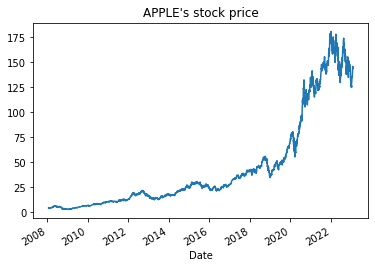

In [112]:
yahoo['Close'].plot(title="APPLE's stock price")

Resample(): reports the average of the previous year

asfreq(): reports the value at the end of the year

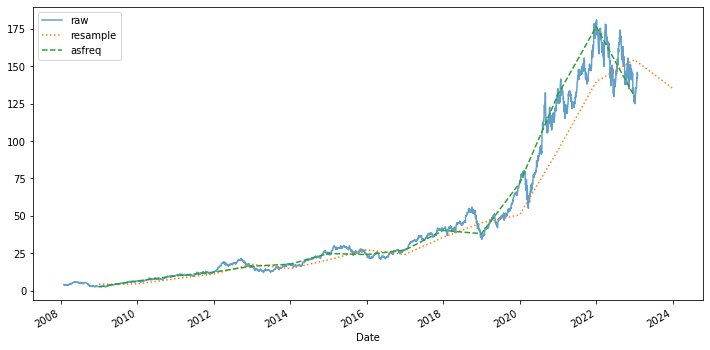

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
yahoo['Close'].plot(alpha=0.7,style='-')
yahoo['Close'].resample('BA').mean().plot(style=':') # resampling 'Close' values in business year by agg. in mean
yahoo['Close'].asfreq('BA').plot(style='--')
plt.legend(['raw','resample','asfreq'],loc='upper left')

<Figure size 1008x576 with 0 Axes>

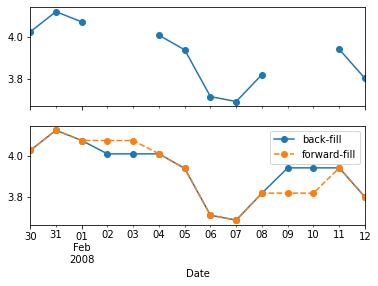

In [115]:
fig, ax =plt.subplots(2,sharex=True)
data = yahoo['Close'].iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

## tshift() vs shift()

In [118]:
display(yahoo['Close'].asfreq('D'), yahoo['Close'].asfreq('D',method='pad').shift(800))

Date
2008-01-30 00:00:00-05:00      4.024021
2008-01-31 00:00:00-05:00      4.120831
2008-02-01 00:00:00-05:00      4.071818
2008-02-02 00:00:00-05:00           NaN
2008-02-03 00:00:00-05:00           NaN
                                ...    
2023-01-26 00:00:00-05:00    143.960007
2023-01-27 00:00:00-05:00    145.929993
2023-01-28 00:00:00-05:00           NaN
2023-01-29 00:00:00-05:00           NaN
2023-01-30 00:00:00-05:00    143.854996
Freq: D, Name: Close, Length: 5480, dtype: float64

Date
2008-01-30 00:00:00-05:00           NaN
2008-01-31 00:00:00-05:00           NaN
2008-02-01 00:00:00-05:00           NaN
2008-02-02 00:00:00-05:00           NaN
2008-02-03 00:00:00-05:00           NaN
                                ...    
2023-01-26 00:00:00-05:00    117.973793
2023-01-27 00:00:00-05:00    116.629921
2023-01-28 00:00:00-05:00    117.232697
2023-01-29 00:00:00-05:00    115.948120
2023-01-30 00:00:00-05:00    115.948120
Freq: D, Name: Close, Length: 5480, dtype: float64

In [129]:
### Since the newest form of the data's index consists of time we need to rearange the index.
yahoo_new_format=yahoo.copy()

In [132]:
yahoo_new_format.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Time_new
Date,,,,,,,,
2008-01-30 00:00:00-05:00,3.999362,4.123572,3.957654,4.024021,1243051600,0.0,0.0,2008-01-30
2008-01-31 00:00:00-05:00,3.940910,4.160103,3.939388,4.120831,1345674400,0.0,0.0,2008-01-31
2008-02-01 00:00:00-05:00,4.147622,4.158277,4.024021,4.071818,1010744000,0.0,0.0,2008-02-01
2008-02-04 00:00:00-05:00,4.085822,4.137271,4.000884,4.007887,899234000,0.0,0.0,2008-02-04
2008-02-05 00:00:00-05:00,3.970744,4.079427,3.924165,3.938170,1141042000,0.0,0.0,2008-02-05


In [133]:
import datetime as dt
formatted_date = '%Y-%m-%d'
yahoo_new_format['Time_new'] = yahoo_new_format.index.to_period('D')

C:\Users\silao\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [134]:
yahoo_new_format=yahoo_new_format.set_index('Time_new')

In [135]:
yahoo_new_format.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Time_new,,,,,,,
2008-01-30,3.999362,4.123572,3.957654,4.024021,1243051600,0.0,0.0
2008-01-31,3.940910,4.160103,3.939388,4.120831,1345674400,0.0,0.0
2008-02-01,4.147622,4.158277,4.024021,4.071818,1010744000,0.0,0.0
2008-02-04,4.085822,4.137271,4.000884,4.007887,899234000,0.0,0.0
2008-02-05,3.970744,4.079427,3.924165,3.938170,1141042000,0.0,0.0


In [138]:
yahoo_new_format['Close'].asfreq('D').tshift(800)

C:\Users\silao\AppData\Local\Temp\ipykernel_548\2796518921.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  yahoo_new_format['Close'].asfreq('D').tshift(800)


Time_new
2010-04-09      4.024021
2010-04-10      4.120831
2010-04-11      4.071818
2010-04-14      4.007887
2010-04-15      3.938170
                 ...    
2025-04-03    142.529999
2025-04-04    141.860001
2025-04-05    143.960007
2025-04-06    145.929993
2025-04-09    143.854996
Freq: D, Name: Close, Length: 3777, dtype: float64

In [143]:
maxi=yahoo_new_format[yahoo_new_format.index.year==2012]
maxi[maxi['Close']==maxi['Close'].max()]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Time_new,,,,,,,
2012-09-19,21.409888,21.523929,21.388792,21.466145,326874800,0.0,0.0


C:\Users\silao\AppData\Local\Temp\ipykernel_548\3842222109.py:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  data.tshift(1000).plot(ax=ax[2])


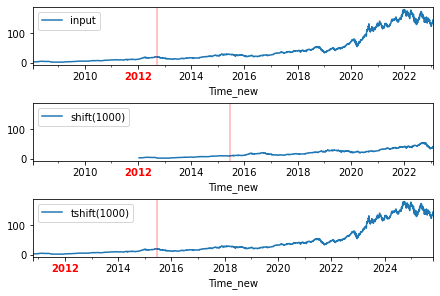

In [146]:
fig, ax = plt.subplots(3, sharey=True, constrained_layout = True)

# apply a frequency to the data
data = yahoo_new_format['Close'].asfreq('D')

data.plot(ax=ax[0])
data.shift(1000).plot(ax=ax[1])
data.tshift(1000).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2012-09-19')
offset = pd.Timedelta(1000, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')


ax[1].legend(['shift(1000)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(1000)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

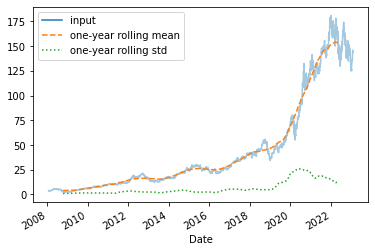

In [147]:
rolling= yahoo['Close'].rolling(365,center=True)

data=pd.DataFrame({'input':yahoo['Close'],
                  'one-year rolling mean': rolling.mean(),
                  'one-year rolling std': rolling.std()})

ax=data.plot(style=['-','--',':'])
ax.lines[0].set_alpha(0.4)